In [9]:
import pandas as pd 
import numpy as np 

In [10]:
#from kaggle.api.kaggle_api_extended import KaggleApi

#api = KaggleApi()
#api.authenticate()

#api.dataset_download_files("yasserh/breast-cancer-dataset", unzip=True)

In [11]:
df =pd.read_csv(r"breast-cancer.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df1 =df.drop(columns=['id'])

In [13]:
df1.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
df1.shape

(569, 31)

In [15]:
x = df1.iloc[:, 1:]   # all columns except first
y = df1.iloc[:, 0]    # first column (diagnosis)

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x.shape

(569, 30)

In [18]:
xtrain.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.1750,0.4228,0.1175
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.678,0.2903,0.4098,0.1284


In [19]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
xtrain =sc.fit_transform(xtrain)
xtest =sc.transform(xtest)

In [20]:
xtrain

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score
ypred = knn.predict(xtest)
accuracy_score(ypred,ytest)

c:\Users\rohan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rohan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rohan\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rohan\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

0.9473684210526315

In [24]:
scores=[]

for i in range(1,16):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)

    scores.append(accuracy_score(ypred,ytest))

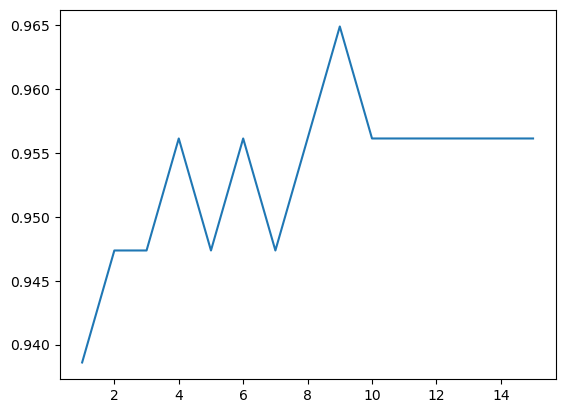

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

### trying diff algo  on this dataset

### logistic regression

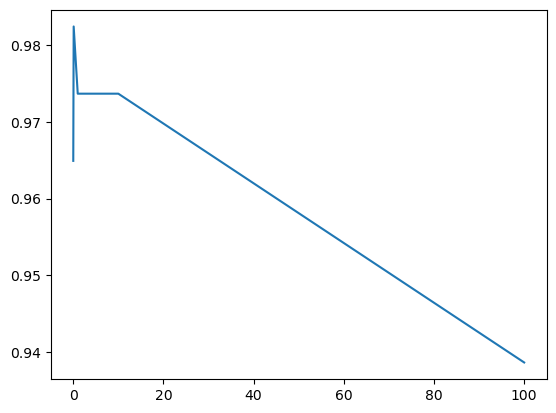

In [27]:
from sklearn.linear_model import LogisticRegression

s =[]

for i in[0.01,0.1,1,10,100]:
    lr=LogisticRegression(C=i, max_iter=5000)
    lr.fit(xtrain,ytrain)
    ypred =lr.predict(xtest)

    s.append(accuracy_score(ypred,ytest))

plt.plot([0.01,0.1,1,10,100],s)
plt.show()

### SVM

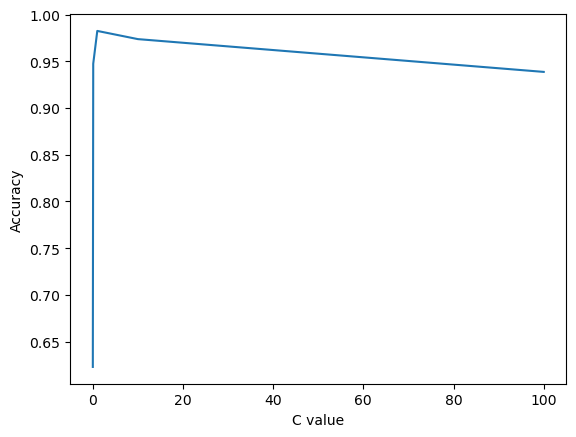

In [32]:
from sklearn.svm import SVC
s= []

for i in [0.01, 0.1, 1, 10, 100]:
    svm =SVC(C=i)
    svm.fit(xtrain,ytrain)
    ypred=svm.predict(xtest)
    s.append(accuracy_score(ytest, ypred))

plt.plot([0.01, 0.1, 1, 10, 100], s)
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()

### Random Forest

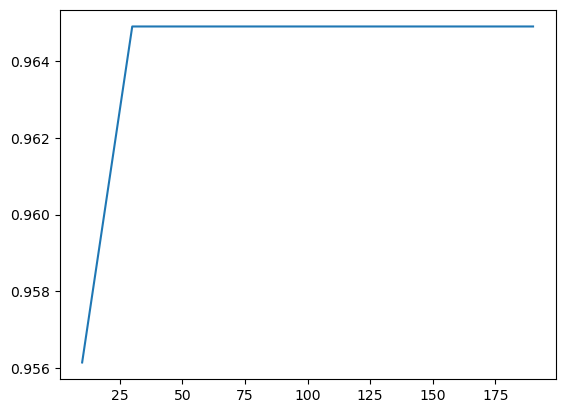

In [34]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for i in range(10, 201, 20):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(xtrain, ytrain)
    ypred = rf.predict(xtest)
    scores.append(accuracy_score(ytest, ypred))

plt.plot(range(10,201,20), scores)
plt.show()